# Regressão Linear - Stats Model

* Regressão linear utilizando a biblioteca Stats Model do Python


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dados = pd.read_csv('Regresao_Linear.csv')

In [3]:
dados.head()

,X,Y
0,0.00000,-11.656137
1,0.10101,-8.074456
2,0.20202,-16.588246
3,0.30303,-4.275013
4,0.40404,-8.714275


In [4]:
X = dados['X'].values
Y = dados['Y'].values

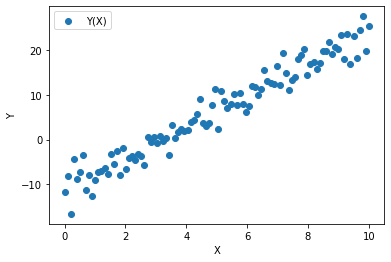

In [5]:
plt.scatter(X,Y,label='Y(X)');
plt.xlabel('X');
plt.ylabel('Y');
plt.legend();

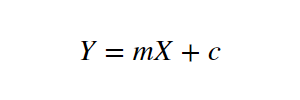

In [6]:
import statsmodels.api as sm

In [7]:
modelo = sm.OLS(Y, X)

In [8]:
resultado = modelo.fit()

In [9]:
print(resultado.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.756
Model:                            OLS   Adj. R-squared (uncentered):              0.754
Method:                 Least Squares   F-statistic:                              307.0
Date:                Thu, 29 Oct 2020   Prob (F-statistic):                    4.23e-32
Time:                        17:27:54   Log-Likelihood:                         -322.75
No. Observations:                 100   AIC:                                      647.5
Df Residuals:                      99   BIC:                                      650.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Modelo precisa de um intercepto

In [10]:
X = sm.add_constant(X)

In [11]:
modelo2 = sm.OLS(Y, X)

In [12]:
resultado2 = modelo2.fit()

In [13]:
print(resultado2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     1740.
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           3.40e-64
Time:                        17:27:55   Log-Likelihood:                -230.75
No. Observations:                 100   AIC:                             465.5
Df Residuals:                      98   BIC:                             470.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.1095      0.488    -22.783      0.0

In [14]:
coef_linear, coef_angular = resultado2.params

In [15]:
reta = coef_angular*X+coef_linear

In [16]:
X = X[:,1]
reta = reta[:,1]

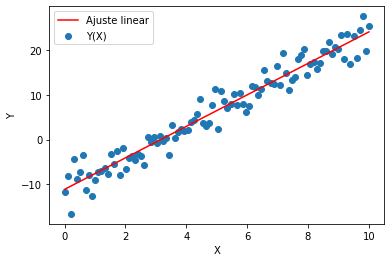

In [17]:
plt.scatter(X,Y,label='Y(X)');
plt.plot(X,reta,label='Ajuste linear',color='red');
plt.xlabel('X');
plt.ylabel('Y');
plt.legend();

In [18]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

MAE = mean_absolute_error(Y,reta)
RMSE = np.sqrt(mean_squared_error(Y,reta))

print("MAE = {:0.2f}".format(MAE))
print("RMSE = {:0.2f}".format(RMSE))

MAE = 1.89
RMSE = 2.43
